In [49]:
#Original Rate Constant from USC Mech
reaction('CH2O + H <=> HCO + H2', [7.149000e+07, 1.9, 2742.0])




# Reaction 84
reaction('CH2O + OH <=> HCO + H2O', [8.338000e+07, 1.63, -1055.0])


NameError: name 'reaction' is not defined

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [ ]:
def func(T, A, n, Ea):
    return np.log(A) + n*np.log(T)+ (-Ea/(1.987*T))

def calc_rc(T,A,n,Ea):
    k = []
    for temp in T:
        k.append(A *(temp**n)* np.exp(-Ea/ (1.987* temp)))
    return k

A: 71490000.0
n: 1.9
Ea: 2742.0


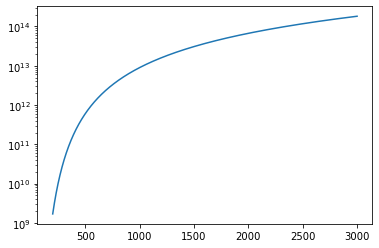

In [106]:
#original rate constnat
Temperature_list = np.arange(200,3000)
k_original = calc_rc(Temperature_list,7.149000e+07, 1.9, 2742.0)
plt.semilogy(Temperature_list,k_original)
print("A:",7.149000e+07 )
print("n:",1.9)
print("Ea:",2742.0)

A: 236488920000.00073
n: 0.9619999999999997
Ea: 13168.0


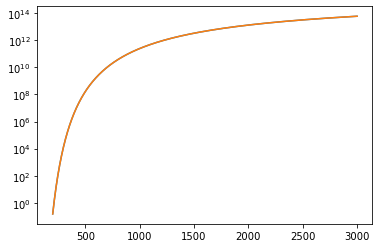

In [107]:
#R(1)
#branching ratio equation
fraction_list = []
for T in Temperature_list:
    fraction = 3.308e3*T**(-0.938)*np.exp(-10426/(1.987*T))
    fraction_list.append(fraction)
#portion of rate constant that promptly dissociates
k_promptly_dissociating = np.array(k_original)*np.array(fraction_list)
plt.semilogy(Temperature_list,k_promptly_dissociating)



popt, pcov = curve_fit(func, Temperature_list, np.log(k_promptly_dissociating))
k_fit_promptly_dissociating = calc_rc(Temperature_list,popt[0],popt[1],popt[2])



print("A:",popt[0] )
print("n:",popt[1])
print("Ea:",popt[2])

plt.semilogy(Temperature_list,k_fit_promptly_dissociating)




A: 1176510752.0238194
n: 1.5138826790861508
Ea: 3093.380812878505


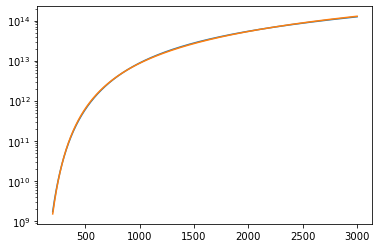

In [108]:
#calculate k new original 
#subtract k_promptly dissocaiting from k_original
k_new_original = np.array(k_original) - np.array(k_promptly_dissociating)
plt.semilogy(Temperature_list,k_new_original)


popt, pcov = curve_fit(func, Temperature_list, np.log(k_new_original))
k_fit_new_original = calc_rc(Temperature_list,popt[0],popt[1],popt[2])



print("A:",popt[0] )
print("n:",popt[1])
print("Ea:",popt[2])

plt.semilogy(Temperature_list,k_fit_new_original)




A: 83380000.0
n: 1.63
Ea: -1055.0


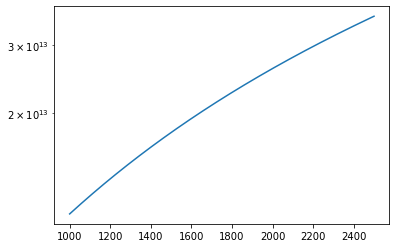

In [110]:
#original rate constnat two
#reaction('CH2O + OH <=> HCO + H2O', [3.430000e+09, 1.18, -447.0])
Temperature_list = np.arange(1000,2500)
k_original_two = calc_rc(Temperature_list,8.338000e+07, 1.63, -1055.0)
plt.semilogy(Temperature_list,k_original_two)
print("A:",8.338000e+07 )
print("n:",1.63)
print("Ea:",-1055.0)

A: 726906840000.0167
n: 0.6819999999999972
Ea: 8959.00000000001


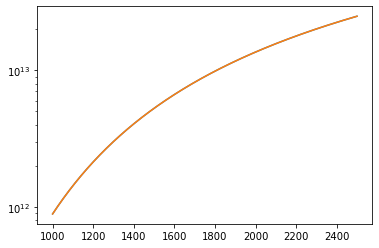

In [111]:
#R(2)
#branching ratio equation
fraction_list_2 = []
for T in Temperature_list:
    fraction = 8.718e3*T**(-0.948)*np.exp(-10014/(1.987*T))
    fraction_list_2.append(fraction)
#portion of rate constant that promptly dissociates
k_promptly_dissociating_2 = np.array(k_original_two)*np.array(fraction_list_2)
plt.semilogy(Temperature_list,k_promptly_dissociating_2)



popt, pcov = curve_fit(func, Temperature_list, np.log(k_promptly_dissociating_2),maxfev=5000)
k_fit_promptly_dissociating_2 = calc_rc(Temperature_list,popt[0],popt[1],popt[2])



print("A:",popt[0] )
print("n:",popt[1])
print("Ea:",popt[2])

plt.semilogy(Temperature_list,k_fit_promptly_dissociating_2)



In [112]:
def func_duplicate(T, A, n, Ea,A2,n2,Ea2,):
    return np.log(A) + n*np.log(T)+ (-Ea/(1.987*T)) + np.log(A2) + n2*np.log(T)+ (-Ea2/(1.987*T))

def calc_rc_duplicate(T,A,n,Ea,A2,n2,Ea2):
    k = []
    for temp in T:
        k.append((A *(temp**n)* np.exp(-Ea/ (1.987* temp))) + (A2 *(temp**n2)* np.exp(-Ea2/ (1.987* temp))))
    return k

A: 6.518708467553375e+19
n: -1.83786125234718
Ea: 5998.054270522653


/Users/carlylagrotta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/Users/carlylagrotta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys


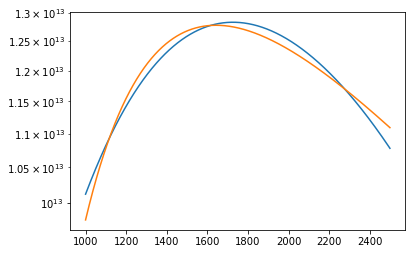

In [113]:
#calculate k new original 
#subtract k_promptly dissocaiting from k_original
k_new_original_2 = np.array(k_original_two) - np.array(k_promptly_dissociating_2)
plt.semilogy(Temperature_list,k_new_original_2)


popt, pcov = curve_fit(func, Temperature_list, np.log(k_new_original_2),method='trf',maxfev=5000)
k_fit_new_original_2 = calc_rc(Temperature_list,popt[0],popt[1],popt[2])


popt2, pcov2 = curve_fit(func_duplicate, Temperature_list, np.log(k_new_original_2),maxfev = 5000)
k_fit_new_original_duplicate = calc_rc_duplicate(Temperature_list,popt2[0],
                                                 popt2[1],popt2[2],popt2[3],popt2[4],popt2[5])


print("A:",popt[0] )
print("n:",popt[1])
print("Ea:",popt[2])

plt.semilogy(Temperature_list,k_fit_new_original_2)

plt.semilogy(Temperature_list,k_fit_new_original_duplicate)

